#                                                     Project

In [3]:
#Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score


## Reading data and Diving data to train and Test

In [4]:

data = pd.read_csv("iris.csv")
print("Describing the data: ",data.describe())
print("Info of the data:",data.info())


Describing the data:                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Sp

In [5]:
print("10 first samples of the dataset:\n",data.head(10))
print("10 last samples of the dataset:\n",data.tail(10))

10 first samples of the dataset:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
10 last samples of the dataset:
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141        

##### Visualisation of the dataset

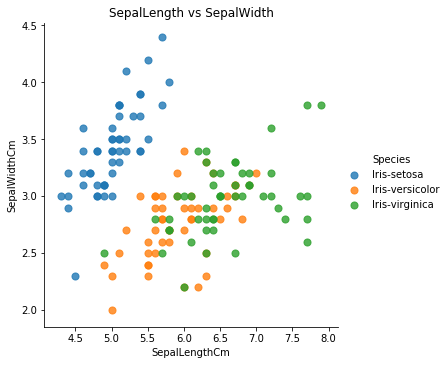

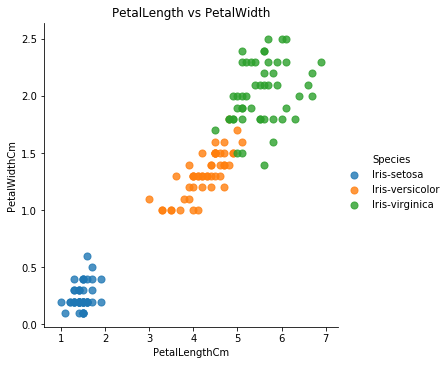

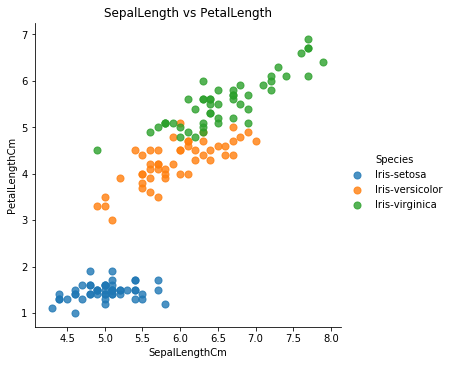

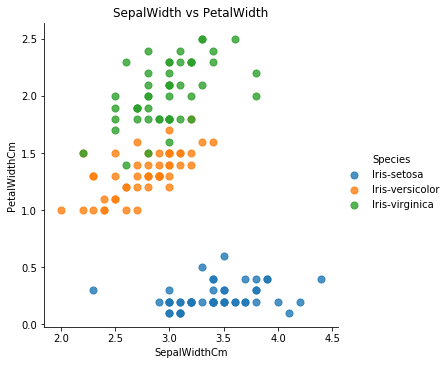

In [6]:
sns.lmplot('SepalLengthCm', 'SepalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('PetalLengthCm', 'PetalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('SepalLengthCm', 'PetalLengthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('SepalWidthCm', 'PetalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()


In [7]:
data.loc[data["Species"]=="Iris-setosa","Species"]=0
data.loc[data["Species"]=="Iris-versicolor","Species"]=1
data.loc[data["Species"]=="Iris-virginica","Species"]=2
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


In [8]:
data=data.iloc[np.random.permutation(len(data))]


# Converting data to numpy array so that we will be ready for processing in model.
X=data.iloc[:,1:5].values
y=data.iloc[:,5].values


##### Applying Normalization

In [9]:
X_normalized=normalize(X,axis=0)
print("normalized X example:\n",X_normalized[:3])

normalized X example:
 [[0.07471338 0.09794497 0.02951407 0.01150299]
 [0.06502832 0.08470916 0.02557886 0.01150299]
 [0.06779548 0.082062   0.02951407 0.0057515 ]]


##### Creating Train,Test and Validation data

In [10]:
# We will use general rule for data division for which:
# we will divide train and test data in 80 to 20 ratio.

total_length_of_data = len(data)



# X training and testing data
X_train = X_normalized[:120]
X_test = X_normalized[120:]

# Y training and testing data
y_train = y[:120]
y_test = y[120:]

# prining the length for both training and testing data

print("Length of Training data:\n\tTrain set X Length: ", X_train.shape[0], "\tTest set y Length: ", y_train.shape[0])
print("Length of Testing data:\n\tTrain set X Length: ", X_test.shape[0], "\tTest set y Length: ", y_test.shape[0])

Length of Training data:
	Train set X Length:  120 	Test set y Length:  120
Length of Testing data:
	Train set X Length:  30 	Test set y Length:  30


## Trainig Neural Network Model

In [11]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

In [12]:
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''


y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)

print("Y-Training set shape : ", y_train.shape)
print("Y-Testing set shape  : ", y_test.shape)


Y-Training set shape :  (120, 3)
Y-Testing set shape  :  (30, 3)


In [13]:

# We have selected sequential model to train our neural network
model = Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              5000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 1s 9ms/step - loss: 1.0860 - acc: 0.4333 - val_loss: 1.0543 - val_acc: 0.7333
Epoch 2/10
120/120 [==============================] - 0s 798us/step - loss: 1.0253 - acc: 0.7583 - val_loss: 0.9482 - val_acc: 0.6667
Epoch 3/10
120/120 [==============================] - 0s 1ms/step - loss: 0.8882 - acc: 0.7250 - val_loss: 0.7680 - val_acc: 0.7333
Epoch 4/10
120/120 [==============================] - 0s 731us/step - loss: 0.6815 - acc: 0.8500 - val_loss: 0.5478 - val_acc: 0.9000
Epoch 5/10
120/120 [==============================] - 0s 873us/step - loss: 0.4775 - acc: 0.9000 - val_loss: 0.4135 - val_acc: 1.0000
Epoch 6/10
120/120 [==============================] - 0s 947us/step - loss: 0.3279 - acc: 0.9583 - val_loss: 0.3206 - val_acc: 0.8667
Epoch 7/10
120/120 [==============================] - 0s 806us/step - loss: 0.2574 - acc: 0.9333 - val_loss

#### Prediction on our model

In [20]:
prediction=model.predict(X_test)
length=len(prediction)
print(length)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )




30
Accuracy of the dataset 100.0
